Name - Aryan Prashant Parab

Task 2 - Predicton using Unsupervised ML.

Objective - Predict the optimum no.of Clusters.

#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset.

In [2]:
df=pd.read_csv('Iris.csv')
df=df.drop(['Id'],axis=1)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Shape of the dataset.

In [4]:
print("No.Of_rows: {}".format(df.shape[0]))
print("NO.of_columns: {}".format(df.shape[1]))

No.Of_rows: 150
NO.of_columns: 5


# Missing Values

In [5]:
df.isnull().sum()      # There are No missing values_present.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Describe dataset.

In [6]:
df.describe().round(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0540,3.7587,1.1987
std,0.8281,0.4336,1.7644,0.7632
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


In [7]:
df1=df.copy()  # safe to keep original dataset.

In [8]:
# Different types of Species.
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
x=df.iloc[:,[0,1,2,3]].values

In [10]:
from sklearn.cluster import KMeans

wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Admin\new anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Elbow curve

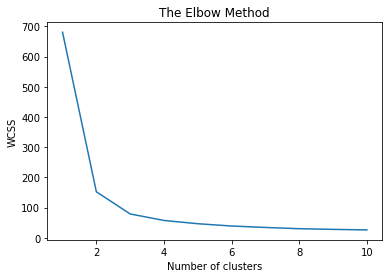

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    #WCSS is the sum of squared distance between each point and the centroid in a cluster.
plt.show()

In [12]:
'''You can clearly see why it is called 'The elbow method' from the 
above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 
'''

"You can clearly see why it is called 'The elbow method' from the \nabove graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. \n"

In [13]:
# from this we choose the number of clusters as 

# Training the K-Means model on the dataset.

In [14]:
# Applying the KMeans function.
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

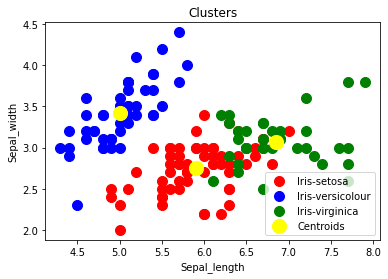

In [15]:
#Visualize the clusters on the first two columns.

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

plt.title('Clusters')
plt.ylabel('Sepal_width')
plt.xlabel('Sepal_length')
plt.legend()